In [1]:
import pandas as pd
import datetime

import json as json
from pandas.io.json import json_normalize

import numpy as np
import os
import scipy.optimize as sco
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
#import pandas_profiling


In [2]:
array_dataframe = []
dados = pd.DataFrame([])
scoins = []

folder_candle = 'Operacoes'

for folder in os.scandir(folder_candle):
    scoins.append(folder.name)
    for entry in os.scandir(folder):
        if entry.is_file():
            coin_symbol = (os.path.splitext(entry.name)[0])        
            with open(entry.path) as d:            
                coin_hist = json.load(d);
            df = json_normalize(coin_hist);

            df['coin'] = folder.name
            df['amount'] = pd.to_numeric(df['amount'].replace('.',','))
            df['rate'] = pd.to_numeric(df['total'].replace('.',','))
            df['total'] = pd.to_numeric(df['total'].replace('.',','))
            df['date'] = pd.to_datetime(df['date'])            
            df['day'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.date
            
            array_dataframe.append(df)       
        
dados = pd.concat(array_dataframe)

dados = dados.replace([np.inf, -np.inf], np.nan)
dados = dados.fillna(0)
#dados.set_index('date','coin'], inplace= True)
dados.head()

,amount,date,globalTradeID,rate,total,tradeID,type,coin,day
0,1.011857,2017-06-30 02:59:58,180965341,2504.041676,2504.041676,5326558,sell,USDT_BTC,2017-06-30
1,0.701143,2017-06-30 02:59:58,180965340,1735.119424,1735.119424,5326557,sell,USDT_BTC,2017-06-30
2,0.799909,2017-06-30 02:59:46,180965161,1980.984991,1980.984991,5326556,buy,USDT_BTC,2017-06-30
3,0.000091,2017-06-30 02:59:46,180965160,0.226574,0.226574,5326555,buy,USDT_BTC,2017-06-30
4,1.719875,2017-06-30 02:59:44,180965150,4256.173623,4256.173623,5326554,sell,USDT_BTC,2017-06-30


In [3]:
grouped_data = dados.groupby('coin', as_index=False)

sorted_grouped_data = sorted(
    grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
    key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
    reverse=True  # largest first
)

grouped_data.describe()

amount                                                                 \
     count         mean          std           min        25%         50%   
0  50000.0     0.436467     1.141295  1.000000e-08   0.009985    0.086915   
1  50000.0  1905.406725  7796.644240  1.000000e-08  15.163426  100.000000   
2  50000.0     1.328321     4.896167  1.000000e-08   0.003674    0.056367   

                              globalTradeID                  ...      \
           75%            max         count          mean    ...       
0     0.409694      44.477456       50000.0  1.803461e+08    ...       
1  1123.596323  367551.956001       50000.0  1.776685e+08    ...       
2     0.709800     198.681090       50000.0  1.771180e+08    ...       

         total                 tradeID                                      \
           75%            max    count       mean           std        min   
0  1020.071201  112083.189448  50000.0  5301558.5  14433.901067  5276559.0   
1   290.787996   90568.661254  50000.0  1103091.5  14433.901067  1078092.0   
2   232.313449   61693.156650  50000.0   627114.5  14433.901067   602115.0   

                                                 
          25%        50%         75%        max  
0  5289058.75  5301558.5  5314058.25  5326558.0  
1  1090591.75  1103091.5  1115591.25  1128091.0  
2   614614.75   627114.5   639614.25   652114.0  

[3 rows x 40 columns]

In [4]:
seg_semestr2017 = grouped_data.apply(lambda g: g[(g['date'] > datetime(2017,6,1)) & (g['date'] < datetime(2018,1,1)) ])
seg_semestr2017.set_index('date', inplace=True)
seg_semestr2017.head()

,amount,globalTradeID,rate,total,tradeID,type,coin,day
date,,,,,,,,
2017-06-30 02:59:58,1.011857,180965341,2504.041676,2504.041676,5326558,sell,USDT_BTC,2017-06-30
2017-06-30 02:59:58,0.701143,180965340,1735.119424,1735.119424,5326557,sell,USDT_BTC,2017-06-30
2017-06-30 02:59:46,0.799909,180965161,1980.984991,1980.984991,5326556,buy,USDT_BTC,2017-06-30
2017-06-30 02:59:46,0.000091,180965160,0.226574,0.226574,5326555,buy,USDT_BTC,2017-06-30
2017-06-30 02:59:44,1.719875,180965150,4256.173623,4256.173623,5326554,sell,USDT_BTC,2017-06-30


Text(0.5,1,'Amount x Date')

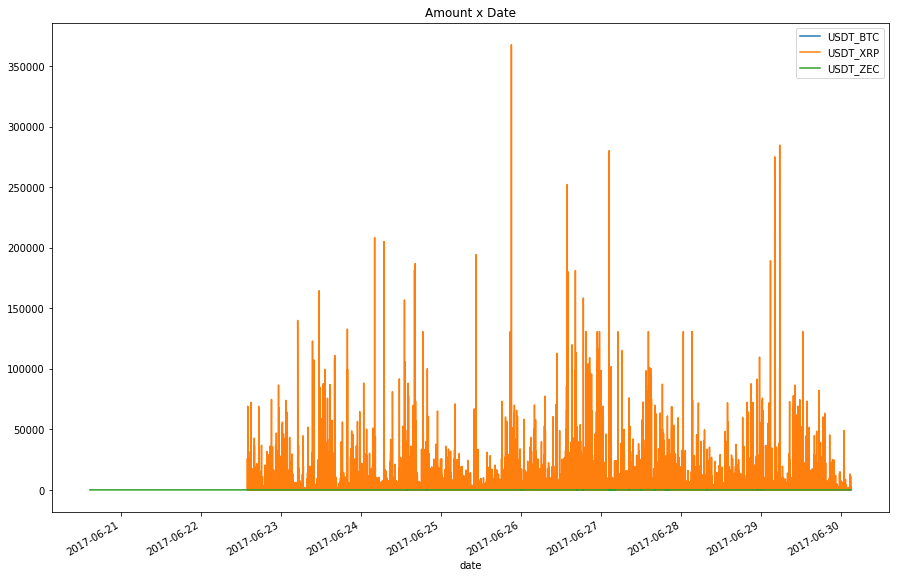

In [5]:
fig, ax = plt.subplots(figsize=(8,6))

for scoin in scoins:
    dados[dados.coin == scoin].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=scoin)    
    
plt.title('Amount x Date')   

Text(0.5,1,'Amount x Date')

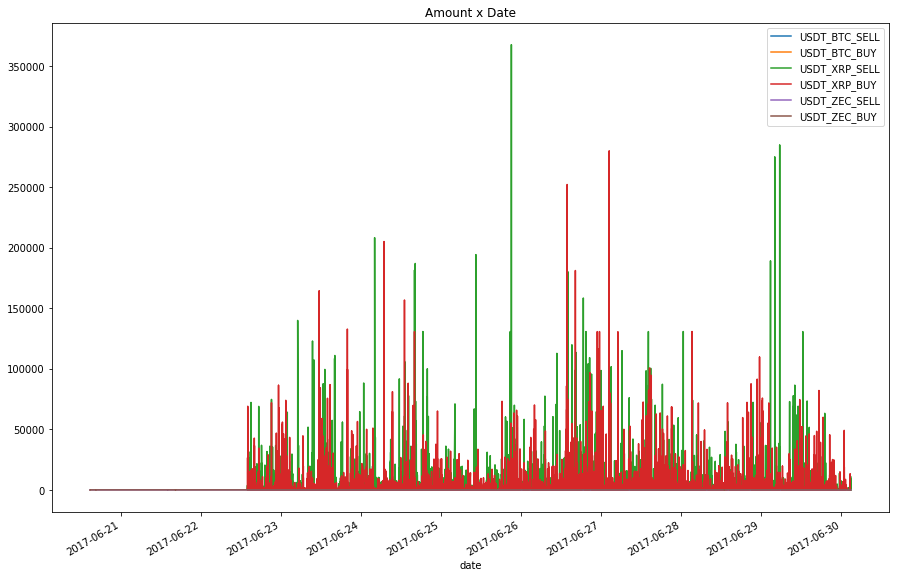

In [6]:
fig, ax = plt.subplots(figsize=(8,6))

for scoin in scoins:
    dados[(dados.coin == scoin) & (dados.type == 'sell')].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=scoin+'_SELL')    
    dados[(dados.coin == scoin) & (dados.type == 'buy')].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=scoin+'_BUY')    
    
plt.title('Amount x Date')   

Text(0.5,1,'Amount x Date - ZEC x BTC')

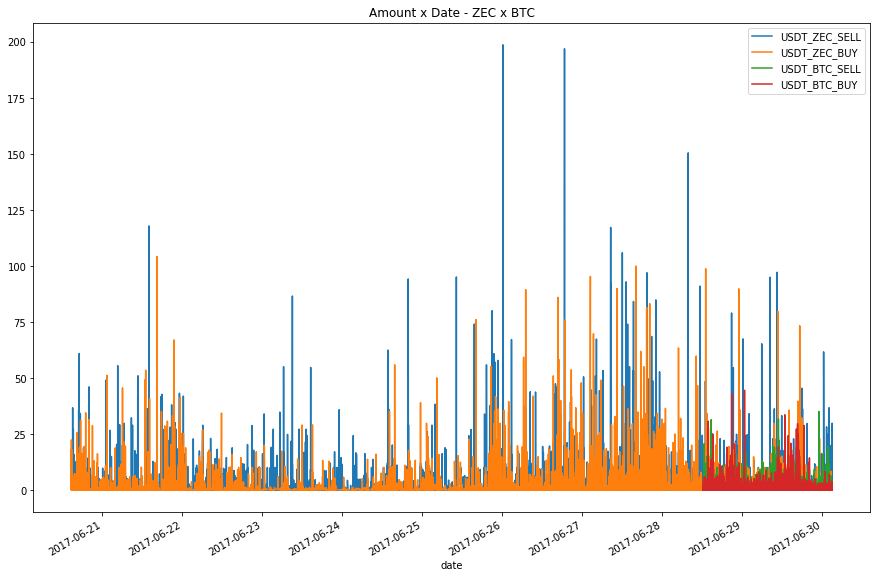

In [7]:
fig, ax = plt.subplots(figsize=(8,6))

scoin = 'USDT_ZEC'
coin2 = 'USDT_BTC'
dados[(dados.coin == scoin) & (dados.type == 'sell')].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=scoin+'_SELL')    
dados[(dados.coin == scoin) & (dados.type == 'buy')].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=scoin+'_BUY')    
dados[(dados.coin == coin2) & (dados.type == 'sell')].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=coin2+'_SELL')    
dados[(dados.coin == coin2) & (dados.type == 'buy')].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=coin2+'_BUY')    


plt.title('Amount x Date - ZEC x BTC')   

In [8]:
n_dt = pd.DataFrame([])

n_dt['date'] = dados['day'];
n_dt['amount'] = dados['amount'];
n_dt['rate'] = dados['rate'];
n_dt['type'] = dados['type'];
n_dt['coin'] = dados['coin'];

n_dt = n_dt.groupby(by=['date','coin','type'])
n_dt.describe()

amount                                           \
                            count         mean           std           min   
date       coin     type                                                     
2017-06-20 USDT_ZEC buy    1929.0     0.756074      2.704211  9.000000e-08   
                    sell   1483.0     1.186854      3.938334  5.000000e-08   
2017-06-21 USDT_ZEC buy    1963.0     1.436387      5.045894  1.000000e-08   
                    sell   3053.0     1.428879      4.788740  1.000000e-08   
2017-06-22 USDT_XRP buy    1252.0  1623.915174   6192.828230  1.000000e-08   
                    sell   1139.0  1785.414700   5906.045666  1.000000e-08   
           USDT_ZEC buy    1380.0     1.207259      2.980925  8.000000e-08   
                    sell   1625.0     1.042410      2.888239  1.000000e-08   
2017-06-23 USDT_XRP buy    2672.0  1865.737817   7354.761911  1.000000e-08   
                    sell   2171.0  2302.094661   8576.075412  1.000000e-08   
           USDT_ZEC buy     996.0     0.504566      2.071435  7.000000e-08   
                    sell   1284.0     1.288779      4.600693  2.000000e-08   
2017-06-24 USDT_XRP buy    3133.0  1649.256855   7333.154090  1.000000e-08   
                    sell   4287.0  2193.276676   8413.096204  1.000000e-08   
           USDT_ZEC buy    2058.0     0.569333      2.591225  1.000000e-08   
                    sell   2081.0     0.813787      3.429456  1.000000e-08   
2017-06-25 USDT_XRP buy    2297.0  1327.440991   4466.194910  1.000000e-08   
                    sell   3092.0  1715.892585   9601.465100  1.000000e-08   
           USDT_ZEC buy    2992.0     0.948180      3.837645  1.000000e-08   
                    sell   2438.0     1.314241      4.898061  1.000000e-08   
2017-06-26 USDT_XRP buy    5128.0  1952.913456   7739.721790  1.000000e-08   
                    sell   5780.0  1817.391201   8144.065151  1.000000e-08   
           USDT_ZEC buy    3584.0     1.503831      5.234055  2.000000e-08   
                    sell   2971.0     1.888319      7.942356  1.000000e-08   
2017-06-27 USDT_XRP buy    4477.0  1954.201415   7905.168041  1.000000e-08   
                    sell   4117.0  1993.604842   7830.960065  1.000000e-08   
           USDT_ZEC buy    6056.0     1.359116      4.797993  1.000000e-08   
                    sell   3890.0     1.900278      6.673155  1.000000e-08   
2017-06-28 USDT_BTC buy   11540.0     0.367779      1.118207  2.000000e-08   
                    sell   9481.0     0.433740      1.022110  1.000000e-08   
           USDT_XRP buy    2880.0  1887.810290   6426.824884  1.000000e-08   
                    sell   2609.0  1879.074625   5541.199722  1.000000e-08   
           USDT_ZEC buy    2663.0     1.471506      4.760734  1.000000e-08   
                    sell   2540.0     1.334448      5.025164  1.000000e-08   
2017-06-29 USDT_BTC buy   13849.0     0.441367      1.231205  2.000000e-08   
                    sell  13389.0     0.498765      1.151623  1.000000e-08   
           USDT_XRP buy    2228.0  1973.794881   6249.121080  1.000000e-08   
                    sell   2548.0  2276.158714  11386.838718  1.000000e-08   
           USDT_ZEC buy    2357.0     1.447623      4.060152  2.000000e-08   
                    sell   2394.0     1.568614      5.289857  1.000000e-08   
2017-06-30 USDT_BTC buy     873.0     0.365192      0.688397  1.000000e-06   
                    sell    868.0     0.412009      1.324955  1.000000e-08   
           USDT_XRP buy      87.0  2386.400687   6355.027104  4.000000e-08   
                    sell    103.0   739.433802   1668.423752  4.000000e-08   
           USDT_ZEC buy     112.0     0.883202      2.188273  4.200000e-07   
                    sell    151.0     2.614487      7.374474  3.100000e-07   

                                                                             \
                                25%         50%          75%            max   
date       coin     type                      

In [9]:
dados.date.unique()

array(['2017-06-30T02:59:58.000000000', '2017-06-30T02:59:46.000000000',
       '2017-06-30T02:59:44.000000000', ...,
       '2017-06-20T14:46:44.000000000', '2017-06-20T14:46:32.000000000',
       '2017-06-20T14:46:13.000000000'], dtype='datetime64[ns]')

In [10]:
for name,group in n_dt:
    nv = {}
   
    nv['day'] = group.date.get(1)
    nv['coin'] = group.coin.get(1)
    nv['amount'] = group.amount.sum()
    nv['rate'] = group.rate.mean()
    nv['type'] = group.type.get(1)
    print(nv)
  

{'day': None, 'coin': None, 'amount': 1458.4658539500001, 'rate': 315.26061327681185, 'type': None}
{'day': None, 'coin': None, 'amount': 1760.1039597999998, 'rate': 494.40841878701281, 'type': None}
{'day': None, 'coin': None, 'amount': 2819.6272516500003, 'rate': 549.44673289120226, 'type': None}
{'day': None, 'coin': None, 'amount': 4362.3678377600008, 'rate': 546.45147916242388, 'type': None}
{'day': None, 'coin': None, 'amount': 2033141.7975186501, 'rate': 443.89062719027163, 'type': None}
{'day': None, 'coin': None, 'amount': 2033587.3429552601, 'rate': 484.07676647546089, 'type': None}
{'day': None, 'coin': None, 'amount': 1666.0168919500002, 'rate': 453.68425928510152, 'type': None}
{'day': None, 'coin': None, 'amount': 1693.91660357, 'rate': 392.6400710356985, 'type': None}
{'day': None, 'coin': None, 'amount': 4985251.4468927402, 'rate': 531.50704301906057, 'type': None}
{'day': None, 'coin': None, 'amount': 4997847.5081133209, 'rate': 651.2684851536435, 'type': None}
{'day':

In [49]:
novo = []
novo_df = pd.DataFrame([])

for name,group in n_dt:
    nv = {}
    nv['day'] = group.date.tolist()[0]
    nv['coin'] = group.coin.tolist()[0]
    nv['coin_type'] = group.coin.tolist()[0]+'_'+group.type.tolist()[0]
    nv['amount'] = group.amount.sum()
    nv['rate'] = group.rate.mean()
    nv['type'] = group.type.tolist()[0]
    novo.append(nv)      

novo_df = pd.DataFrame(novo)
novo_df.set_index('day', inplace=True)
novo_df.head()    

,amount,coin,coin_type,rate,type
day,,,,,
2017-06-20,1.458466e+03,USDT_ZEC,USDT_ZEC_buy,315.260613,buy
2017-06-20,1.760104e+03,USDT_ZEC,USDT_ZEC_sell,494.408419,sell
2017-06-21,2.819627e+03,USDT_ZEC,USDT_ZEC_buy,549.446733,buy
2017-06-21,4.362368e+03,USDT_ZEC,USDT_ZEC_sell,546.451479,sell
2017-06-22,2.033142e+06,USDT_XRP,USDT_XRP_buy,443.890627,buy


Text(0.5,1,'Amount x Date - ZEC x BTC')

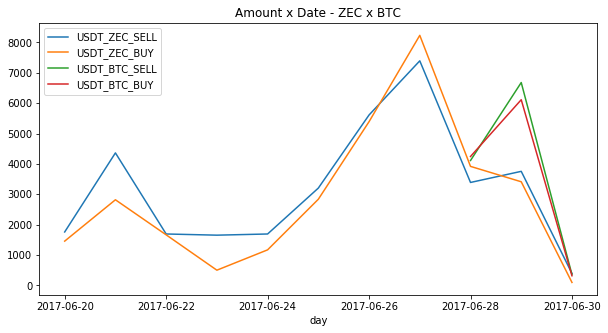

In [50]:
fig, ax = plt.subplots(figsize=(8,6))

scoin = 'USDT_ZEC'
coin2 = 'USDT_BTC'
novo_df[(novo_df.coin == scoin) & (novo_df.type == 'sell')].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label=scoin+'_SELL')    
novo_df[(novo_df.coin == scoin) & (novo_df.type == 'buy')].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label=scoin+'_BUY')    
novo_df[(novo_df.coin == coin2) & (novo_df.type == 'sell')].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label=coin2+'_SELL')    
novo_df[(novo_df.coin == coin2) & (novo_df.type == 'buy')].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label=coin2+'_BUY')    


plt.title('Amount x Date - ZEC x BTC')   

Text(0.5,1,'Amount x Date - ZEC x BTC')

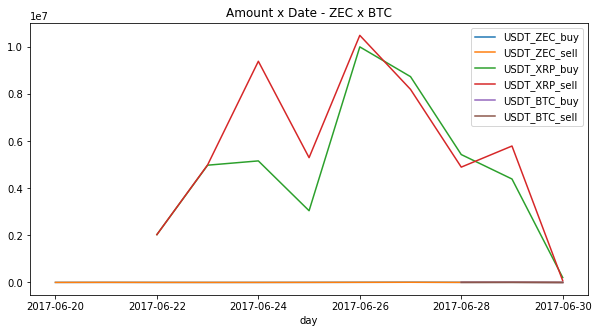

In [78]:
fig, ax = plt.subplots(figsize=(8,6))

for coin_type in novo_df.coin_type.unique():
    #print(novo_df[novo_df.coin_type == coin_type].amount)
    novo_df[novo_df.coin_type == coin_type].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label= coin_type)

plt.title('Amount x Date - ZEC x BTC')   

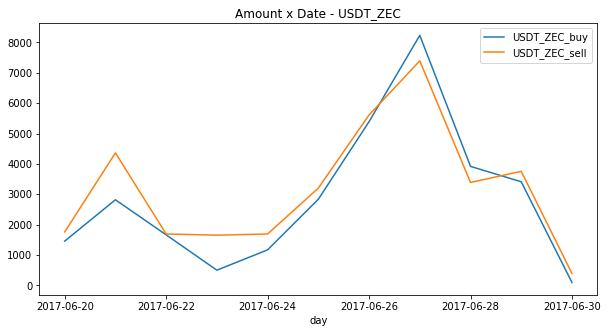

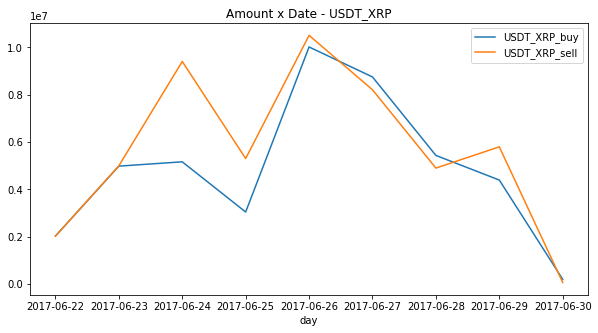

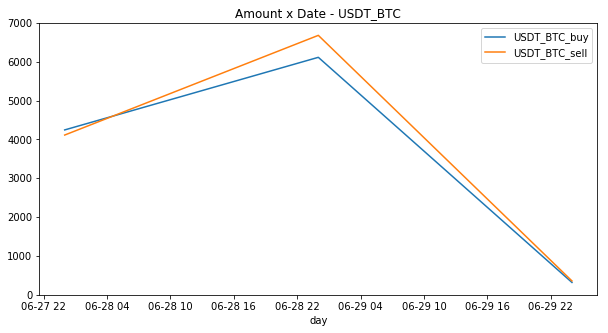

In [86]:
for coin in novo_df.coin.unique():
    fig, ax = plt.subplots(figsize=(8,6))
    for coin_type in novo_df[novo_df.coin == coin].coin_type.unique():
        novo_df[novo_df.coin_type == coin_type].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label= coin_type)
    plt.title('Amount x Date - '+coin)   

Text(0.5,1,'Amount x Date - ZEC x BTC')

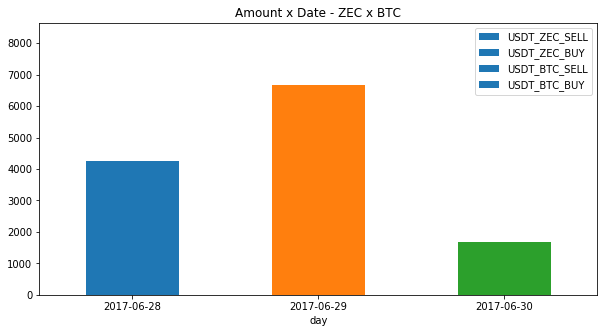

In [45]:
fig, ax = plt.subplots(figsize=(8,6))

scoin = 'USDT_ZEC'
coin2 = 'USDT_BTC'
novo_df[(novo_df.coin == scoin) & (novo_df.type == 'sell')].plot(kind='bar', y='amount', figsize=(10,5), ax=ax, label=scoin+'_SELL', rot=0)    
novo_df[(novo_df.coin == scoin) & (novo_df.type == 'buy')].plot(kind='bar', y='amount', figsize=(10,5), ax=ax, label=scoin+'_BUY', rot=0)    
novo_df[(novo_df.coin == coin2) & (novo_df.type == 'sell')].plot(kind='bar', y='amount', figsize=(10,5), ax=ax, label=coin2+'_SELL', rot=0)    
novo_df[(novo_df.coin == coin2) & (novo_df.type == 'buy')].plot(kind='bar', y='amount', figsize=(10,5), ax=ax, label=coin2+'_BUY', rot=0)     


plt.title('Amount x Date - ZEC x BTC')   

In [76]:
print(novo_df)

                  amount      coin      coin_type         rate  type
day                                                                 
2017-06-20  1.458466e+03  USDT_ZEC   USDT_ZEC_buy   315.260613   buy
2017-06-20  1.760104e+03  USDT_ZEC  USDT_ZEC_sell   494.408419  sell
2017-06-21  2.819627e+03  USDT_ZEC   USDT_ZEC_buy   549.446733   buy
2017-06-21  4.362368e+03  USDT_ZEC  USDT_ZEC_sell   546.451479  sell
2017-06-22  2.033142e+06  USDT_XRP   USDT_XRP_buy   443.890627   buy
2017-06-22  2.033587e+06  USDT_XRP  USDT_XRP_sell   484.076766  sell
2017-06-22  1.666017e+03  USDT_ZEC   USDT_ZEC_buy   453.684259   buy
2017-06-22  1.693917e+03  USDT_ZEC  USDT_ZEC_sell   392.640071  sell
2017-06-23  4.985251e+06  USDT_XRP   USDT_XRP_buy   531.507043   buy
2017-06-23  4.997848e+06  USDT_XRP  USDT_XRP_sell   651.268485  sell
2017-06-23  5.025478e+02  USDT_ZEC   USDT_ZEC_buy   192.708023   buy
2017-06-23  1.654793e+03  USDT_ZEC  USDT_ZEC_sell   488.632369  sell
2017-06-24  5.167122e+06  USDT_XRP